# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv(dotenv_path = 'Api_keys.env')
# Set Alpaca API key and secret, we may need it later
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key= os.environ['news_api'])

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q ='bitcoin AND BTC', language = 'en', sort_by = 'relevancy')
btc_articles

{'status': 'ok',
 'totalResults': 1402,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Bitcoin Could Hit $20K Again But This Time No One Cares',
   'description': 'If you’ve been watching the crypto markets over the past few weeks you’ll have noticed something special: bitcoin, everyone’s favorite decentralized digital currency based on hype, lies, and general malfeasance, is about to hit $20,000—if it can break through…',
   'url': 'https://gizmodo.com/bitcoin-could-hit-20k-again-but-this-time-no-one-cares-1845757159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/puaxex5okv9olikadyqf.jpg',
   'publishedAt': '2020-11-25T23:00:00Z',
   'content': 'If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+249

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum AND ETH', language='en', sort_by='relevancy')
eth_articles

{'status': 'ok',
 'totalResults': 471,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Staff',
   'title': 'Bitcoin rises to three-year peak, all-time high in sight - Reuters UK',
   'description': 'Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just under $20,000 (15,060.24 pounds).',
   'url': 'https://uk.reuters.com/article/uk-crypto-currencies-idUKKBN2801WH',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201120&t=2&i=1541908846&r=LYNXMPEGAJ0ZP&w=800',
   'publishedAt': '2020-11-20T15:01:00Z',
   'content': 'By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Sta

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        btc_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
df_btc = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
df_btc = df_btc[cols]

df_btc.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
1,-0.2960,0.062,0.937,0.000,A $1 billion transaction that flowed out of a ...
2,-0.5423,0.093,0.907,0.000,14 with 14 posters participating\r\nOn Wednesd...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
4,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...


In [7]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        eth_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
df_eth = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
df_eth = df_eth[cols]

df_eth.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.000,1.000,0.000,The New York Times is (probably) about to publ...
3,0.5106,0.000,0.912,0.088,Each comment or response costs a tiny ETH fee ...
4,0.2263,0.047,0.878,0.075,"LONDON (Reuters) - Bitcoin passed $17,000 on T..."


In [9]:
# Describe the Bitcoin Sentiment
df_btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.127140,0.025450,0.921750,0.052750
std,0.350983,0.039429,0.059731,0.052619
min,-0.599400,0.000000,0.773000,0.000000
25%,-0.012900,0.000000,0.883250,0.000000
50%,0.088950,0.000000,0.920500,0.051500
75%,0.453775,0.050750,0.962500,0.086000
max,0.571900,0.129000,1.000000,0.152000


In [49]:
# Describe the Ethereum Sentiment
df_eth.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.311861,0.008611,0.915278,0.076111
std,0.292370,0.019909,0.073266,0.069775
min,0.000000,0.000000,0.780000,0.000000
25%,0.000000,0.000000,0.861000,0.000000
50%,0.226300,0.000000,0.917000,0.076500
75%,0.556575,0.000000,1.000000,0.126500
max,0.802000,0.058000,1.000000,0.220000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum**

Q: Which coin had the highest compound score?

A: **Ethereum**

Q. Which coin had the highest positive score?

A: **Ethereum**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)

    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + addl_stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    
    return text


In [13]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in df_btc.Text]   
df_btc['Tokens'] = btc_tokens
df_btc.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
1,-0.2960,0.062,0.937,0.000,A $1 billion transaction that flowed out of a ...,"[billion, transaction, flowed, dormant, wallet..."
2,-0.5423,0.093,0.907,0.000,14 with 14 posters participating\r\nOn Wednesd...,"[poster, participating, wednesday, ar, reporte..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
4,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."


In [14]:
# Create a new tokens column for ethereum

eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in df_eth.Text]   
df_eth['Tokens'] = eth_tokens
df_eth.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
2,0.0000,0.000,1.000,0.000,The New York Times is (probably) about to publ...,"[new, york, time, probably, publish, story, cr..."
3,0.5106,0.000,0.912,0.088,Each comment or response costs a tiny ETH fee ...,"[comment, response, cost, tiny, fee, cryptocur..."
4,0.2263,0.047,0.878,0.075,"LONDON (Reuters) - Bitcoin passed $17,000 on T...","[london, reuters, passed, tuesday, touch, high..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

btc_ngram_counts = [Counter(ngrams(tokens, n=2)) for tokens in df_btc.Tokens]
dict(btc_ngram_counts[0].most_common(10))

{('youve', 'watching'): 1,
 ('watching', 'crypto'): 1,
 ('crypto', 'market'): 1,
 ('market', 'past'): 1,
 ('past', 'week'): 1,
 ('week', 'youll'): 1,
 ('youll', 'noticed'): 1,
 ('noticed', 'something'): 1,
 ('something', 'special'): 1,
 ('special', 'everyones'): 1}

In [17]:
# Generate the Ethereum N-grams where N=2

eth_ngram_counts = [Counter(ngrams(tokens, n=2)) for tokens in df_eth.Tokens]
dict(eth_ngram_counts[0].most_common(10))

{('reuters', 'staff'): 1,
 ('staff', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'seen'): 1,
 ('seen', 'illustration'): 1,
 ('illustration', 'taken'): 1,
 ('taken', 'november'): 1,
 ('november', 'reutersdado'): 1,
 ('reutersdado', 'ruvicillustration'): 1}

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
btc_words = []
for tokens in df_btc.Tokens:
    btc_words += tokens
btc_token_count = token_count(btc_words)
btc_token_count

[('char', 20),
 ('reuters', 9),
 ('currency', 6),
 ('new', 6),
 ('york', 6),
 ('price', 6),
 ('since', 6),
 ('taken', 5),
 ('asset', 5),
 ('crypto', 4)]

In [21]:
# Get the top 10 words for Ethereum
eth_words = []
for tokens in df_eth.Tokens:
    eth_words += tokens
eth_token_count = token_count(eth_words)
eth_token_count

[('char', 18),
 ('contract', 8),
 ('reuters', 7),
 ('taken', 5),
 ('york', 5),
 ('ha', 5),
 ('deposit', 4),
 ('representation', 3),
 ('virtual', 3),
 ('currency', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

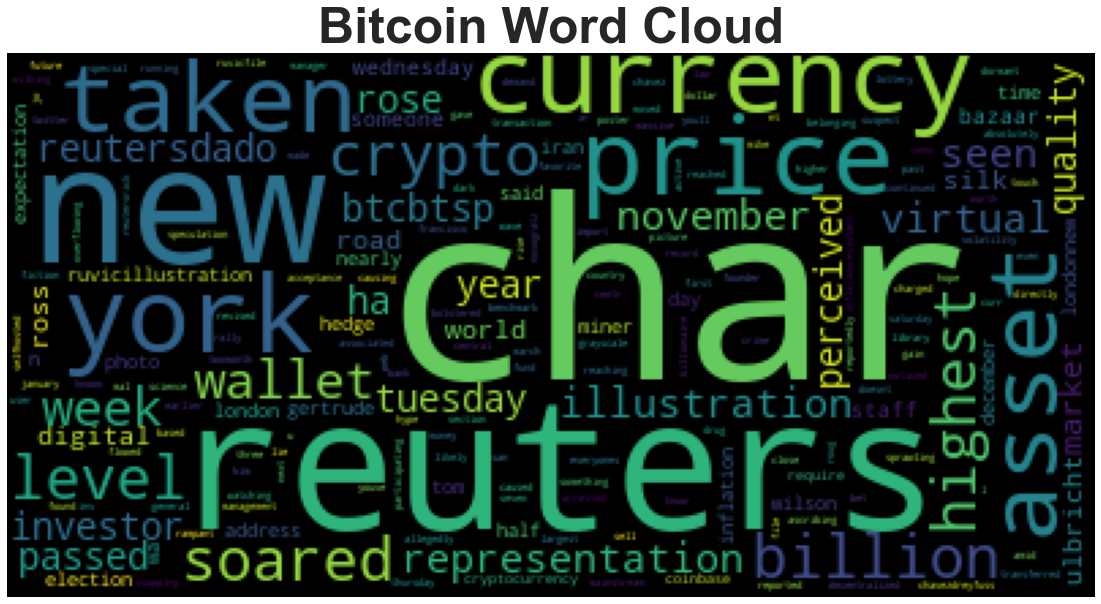

In [23]:
# Generate the Bitcoin word cloud

btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in df_btc.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

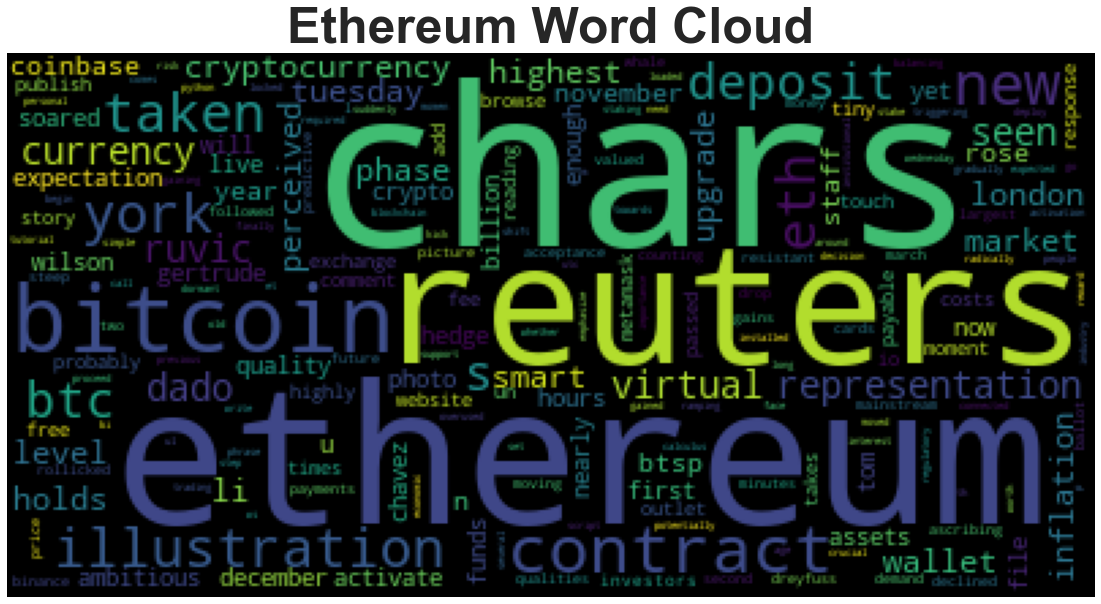

In [47]:
# Generate the Ethereum word cloud
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
eth_corpus = ''
for token in df_eth.Text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize= 50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
btc_corpus

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]A $1 billion transaction that flowed out of a dormant bitcoin wallet allegedly belonging to Silk Road founder Ross Ulbricht made waves in the crypto world this week, causing some to suspect the found… [+2022 chars]14 with 14 posters participating\r\nOn Wednesday, Ars reported that someone had transferred close to $1 billion in bitcoin out of a wallet likely associated with the Silk Road crime bazaar. Now we know… [+1674 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic

In [28]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [48]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$1 billion',
 '$43 billion',
 '0.00011',
 '10%',
 '10,000',
 '14',
 '17,000',
 '19,665',
 '2.0',
 '2.6%',
 '2015',
 '21:00',
 '385,440',
 '4 hours',
 '4 p.m. ET',
 '4%',
 '4,000',
 '50k',
 '69,369',
 'Ars',
 'BTC',
 'BTSP',
 'Bi',
 'Bitcoin',
 'Central Bank to Fund Imports',
 'Chavez-Dreyfuss',
 'Coinbase',
 'December 2017',
 'ETH',
 'Ethereum (ETH',
 'Ethereum 2.0',
 'Ethereum 2.0’s',
 'Ethereums 2.0',
 'Grayscale',
 'Iran',
 'JPMorgan',
 'January 2018',
 'Kim Jo',
 'LONDON',
 'March 13, 2020',
 'Mike Novogratz',
 'Nearly $1 billion',
 'New Bitcoin',
 'New Crypto Law Requires Miners to',
 'November 19, 2020',
 'November 2017',
 'Python',
 'REUTERS/',
 'Reuters',
 'Rick Wilking',
 'Ross Ulbricht',
 'San Francisco',
 'Saturday',
 'Silk Road',
 'Thursday',
 'Tom Wilson',
 'Tuesday',
 'Twitter',
 'Two',
 'U.S.',
 'Wednesday',
 'YORK',
 'a record $10.4 billion',
 'about 5¢',
 'age-old',
 'around $15,694',
 'bitcoin',
 'chars]Bitcoin',
 'chars]More than 500,000',
 'chars]The New York Time

---

## Ethereum NER

In [38]:
# Concatenate all of the Ethereum  text together
eth_corpus

"by reuters staff\r\na representation of virtual currency bitcoin is seen in this illustration taken november 19, 2020. reuters/dado ruvic/illustration\r\nnew york (reuters) - bitcoin btc=btsp rose to a n… [+1407 chars]by reuters staff\r\na representation of virtual currency bitcoin is seen in this illustration taken november 19, 2020. reuters/dado ruvic/illustration\r\nnew york (reuters) - bitcoin btc=btsp rose to a n… [+1388 chars]the new york times is (probably) about to publish a story about cryptocurrency exchange coinbase. but we're not reading about it on the news outlet's website, because coinbase has taken the highly un… [+3993 chars]each comment or response costs a tiny eth fee of 0.00011 (about 5¢ in ethereum cryptocurrency), payable from your metamask.io wallet (the wallet is free, and takes just a moment to add to your browse… [+558 chars]london (reuters) - bitcoin passed $17,000 on tuesday to touch its highest level this year, with investors ascribing the gains to demand 

In [39]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)


# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [40]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [41]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$43 billion',
 '0.00011',
 '10%',
 '17,000',
 '2.0',
 '2.6%',
 '20 minutes',
 '21:00',
 '385,440',
 '4 hours',
 '4 p.m. et',
 '4%',
 '4,000',
 '50k',
 'about 5¢',
 'around $15,694',
 'btsp rose',
 'chars]london/new york',
 'chars]more than 500,000',
 'chars]the new york times',
 'chavez-dreyfuss',
 'december 2017',
 'ethereum (eth',
 'first',
 'jpmorgan',
 'last week',
 'london',
 'march 13, 2020',
 'multi-year',
 'nearly $1 billion',
 'new york',
 'november 19, 2020',
 'reuters',
 'reuters/dado ruvic//file',
 'second',
 'the previous 24',
 'this year',
 'tom wilson',
 'tuesday',
 'two',
 'u.s.',
 'ul><li',
 'un',
 'wednesday'}